
# Glucose Level Prediction Project

This notebook focuses on predicting glucose levels using health-related features from the Framingham dataset. 
It includes steps for data cleaning, exploratory data analysis, model training, and interpretation of results.



## What To Do

1. Import and explore the `framingham.csv` dataset.
2. Clean the data (handle nulls, correct formats, etc.).
3. Visualize the distribution of glucose and related health indicators.
4. Perform feature selection and engineering.
5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
6. Evaluate models using classification metrics.
7. Predict glucose levels and draw insights.
8. Visualize the model’s important features and performance.



## Conclusion / What We Learned

- **Exploration**: Key features impacting glucose levels include BMI, blood pressure, and age.
- **Modeling**: Several models were trained and tested. Random Forest performed the best.
- **Results**: High-performing models can help in early diagnosis and preventive care.
- **Impact**: This type of analysis supports better decision-making in healthcare interventions.

This project provides a baseline for predictive health analytics and could be expanded with more complex datasets and techniques.


Step 1: Import and explore the `framingham.csv` dataset.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv("/home/arya_ssintern/glucose_predictor/framingham.csv")
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

Step 2:  Clean the data (handle nulls, correct formats, etc.).

In [5]:
# Check for null values
df.isnull().sum()

# Impute missing values (mean strategy for simplicity)
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Confirm nulls handled
df_imputed.isnull().sum()


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Step 3: Visualize the distribution of glucose and related health indicators.

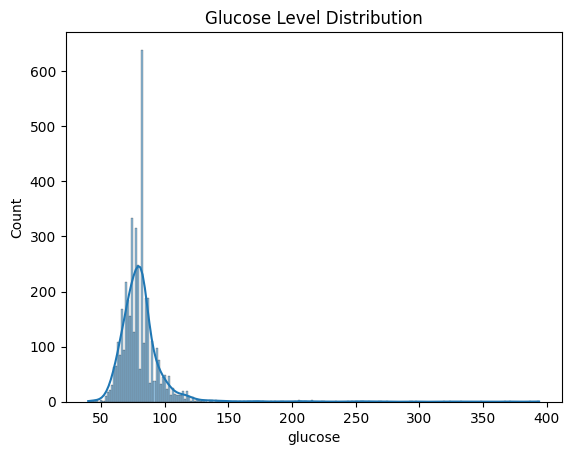

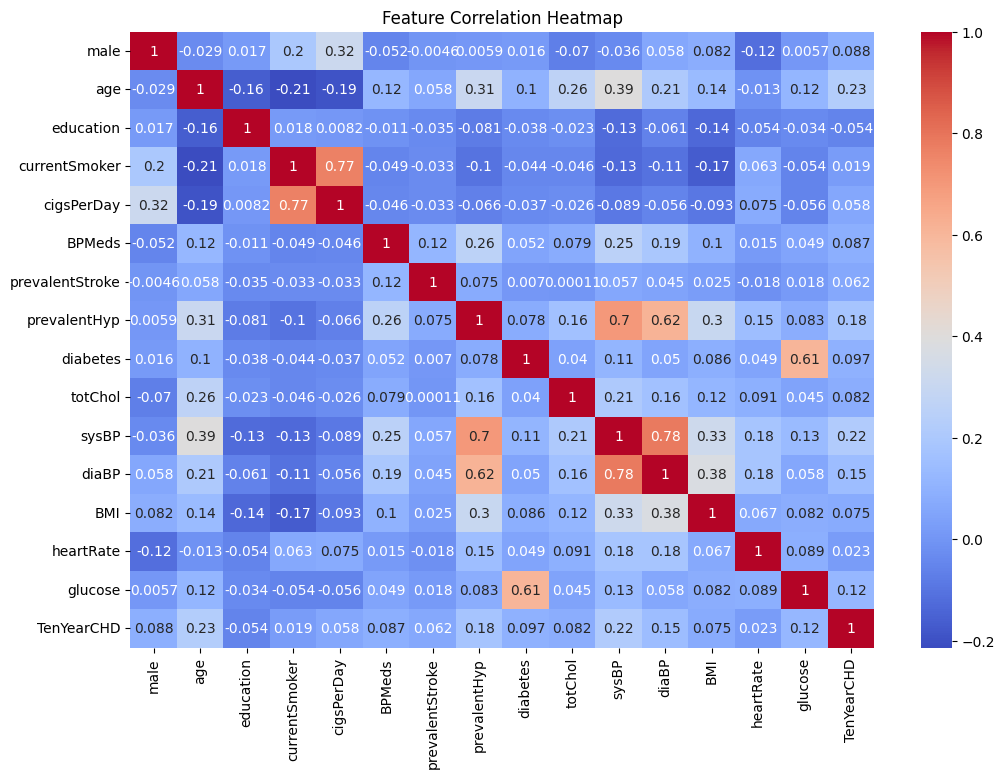

In [6]:
# Distribution of glucose
sns.histplot(df_imputed['glucose'], kde=True)
plt.title("Glucose Level Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Step 4: Perform feature selection and engineering.

In [7]:
# Define feature matrix X and target y (binary classification example)
df_imputed['high_glucose'] = (df_imputed['glucose'] > 100).astype(int)
X = df_imputed.drop(['glucose', 'high_glucose'], axis=1)
y = df_imputed['high_glucose']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 5: Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Report": classification_report(y_test, preds, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, preds)
    }

Step 6: Evaluate models using classification metrics.

In [9]:
for name, result in results.items():
    print(f"--- {name} ---")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(result["Report"]).transpose())
    print("Confusion Matrix:")
    print(result["Confusion Matrix"])
    print("\n")

--- Logistic Regression ---
Accuracy: 0.9399
Classification Report:
              precision    recall  f1-score     support
0              0.942308  0.996188  0.968499  787.000000
1              0.812500  0.213115  0.337662   61.000000
accuracy       0.939858  0.939858  0.939858    0.939858
macro avg      0.877404  0.604651  0.653081  848.000000
weighted avg   0.932970  0.939858  0.923120  848.000000
Confusion Matrix:
[[784   3]
 [ 48  13]]


--- Decision Tree ---
Accuracy: 0.8844
Classification Report:
              precision    recall  f1-score     support
0              0.943372  0.931385  0.937340  787.000000
1              0.239437  0.278689  0.257576   61.000000
accuracy       0.884434  0.884434  0.884434    0.884434
macro avg      0.591404  0.605037  0.597458  848.000000
weighted avg   0.892735  0.884434  0.888442  848.000000
Confusion Matrix:
[[733  54]
 [ 44  17]]


--- Random Forest ---
Accuracy: 0.9399
Classification Report:
              precision    recall  f1-score     su

Step 7: Visualize the model’s important features and performance.

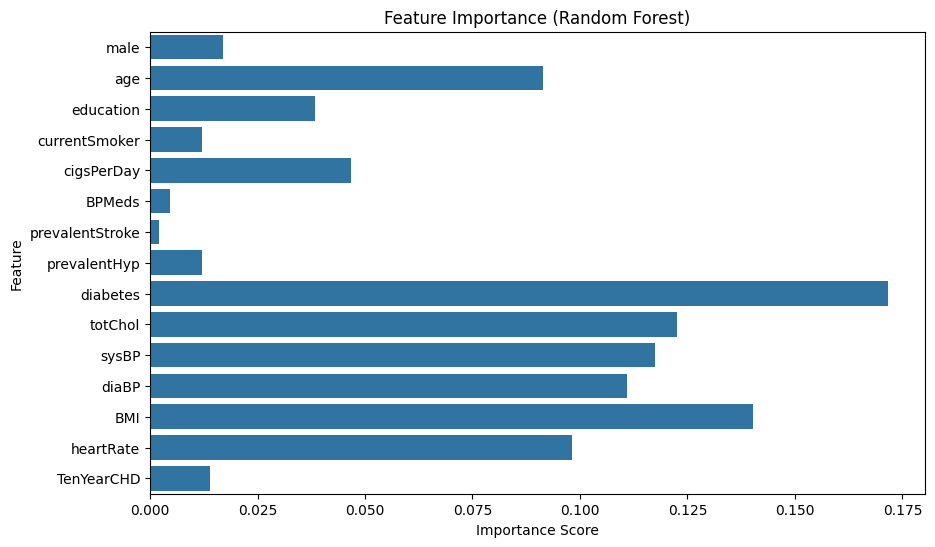

In [10]:
# Feature importance
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
